# ロボットモデルの使い方

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## ロボットモデル(raw)のロード

In [2]:
fname = iu.parseURL('choreonoid://share/model/HRP4C/HRP4C.body')
if iu.isInChoreonoid():
    rb = ib.loadRobotItem(fname, world=False) ## in choreonoid GUI
else:
    rb = iu.loadRobot(fname) ## without GUI

## Link名とJoint名

In [3]:
if type(rb) is Body:
    for idx, lk in enumerate(rb.links):
        print('link {}: {}'.format(idx, lk.name))
    for idx, j in enumerate(rb.joints):
        print('joint {}: {}'.format(idx, j.jointName))
else:
    for idx, lk in enumerate(rb.body.links):
        print('link {}: {}'.format(idx, lk.name))
    for idx, j in enumerate(rb.body.joints):
        print('joint {}: {}'.format(idx, j.jointName))

link 0: WAIST
link 1: L_HIP_Y
link 2: L_HIP_R
link 3: L_HIP_P
link 4: L_KNEE_P
link 5: L_ANKLE_P
link 6: L_ANKLE_R
link 7: L_TOE_P
link 8: R_HIP_Y
link 9: R_HIP_R
link 10: R_HIP_P
link 11: R_KNEE_P
link 12: R_ANKLE_P
link 13: R_ANKLE_R
link 14: R_TOE_P
link 15: CHEST_P
link 16: CHEST_R
link 17: CHEST_Y
link 18: NECK_Y
link 19: NECK_R
link 20: NECK_P
link 21: L_SHOULDER_P
link 22: L_SHOULDER_R
link 23: L_SHOULDER_Y
link 24: L_ELBOW_P
link 25: L_WRIST_Y
link 26: L_WRIST_R
link 27: R_SHOULDER_P
link 28: R_SHOULDER_R
link 29: R_SHOULDER_Y
link 30: R_ELBOW_P
link 31: R_WRIST_Y
link 32: R_WRIST_R
joint 0: L_HIP_Y
joint 1: L_HIP_R
joint 2: L_HIP_P
joint 3: L_KNEE_P
joint 4: L_ANKLE_P
joint 5: L_ANKLE_R
joint 6: L_TOE_P
joint 7: R_HIP_Y
joint 8: R_HIP_R
joint 9: R_HIP_P
joint 10: R_KNEE_P
joint 11: R_ANKLE_P
joint 12: R_ANKLE_R
joint 13: R_TOE_P
joint 14: CHEST_P
joint 15: CHEST_R
joint 16: CHEST_Y
joint 17: NECK_Y
joint 18: NECK_R
joint 19: NECK_P
joint 20: L_SHOULDER_P
joint 21: L_SHOULDER_R

## IRSLのRobotModelクラスの使い方
こちらを主に使って下さい。

irsl_choreonoid.robot_util.RobotModelWrapped クラスになります。

クラス定義
https://irsl-tut.github.io/irsl_documents/ja/module_irsl_choreonoid.html#irsl_choreonoid.robot_util.RobotModelWrapped

### オブジェクトを作る

In [4]:
robot = RobotModel(rb)

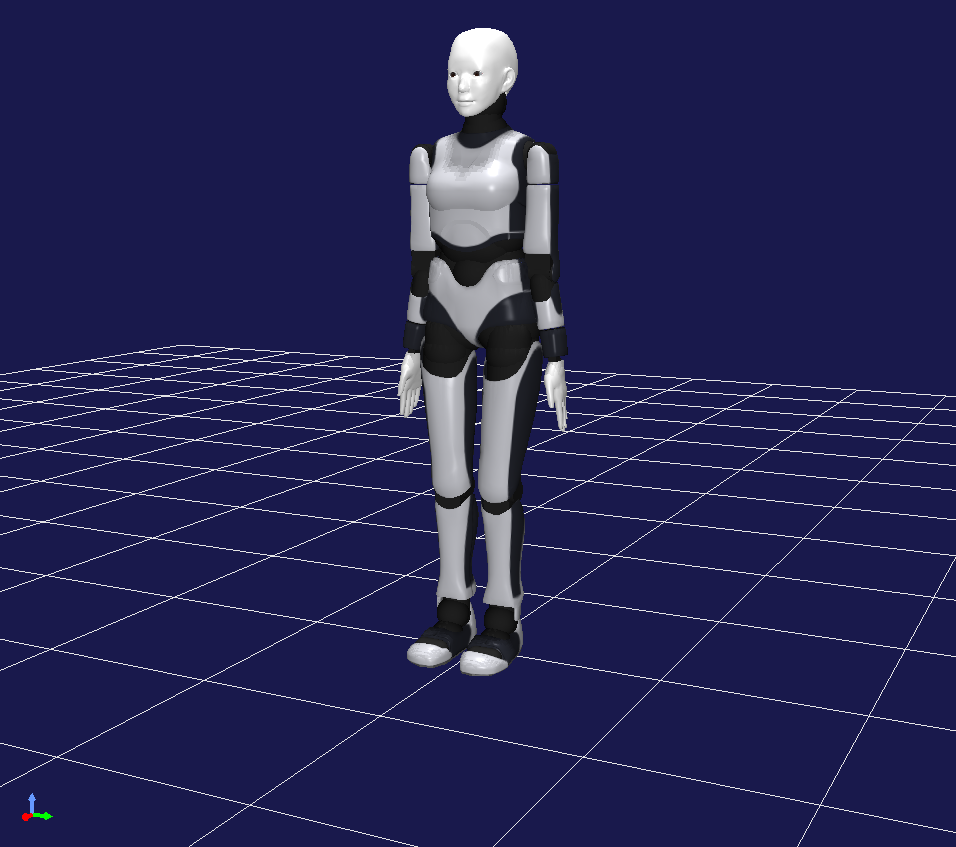

In [5]:
%display

### リンクのリスト

In [6]:
robot.linkList

[<cnoid.Body.Link named 'WAIST'>, <cnoid.Body.Link named 'L_HIP_Y'>, <cnoid.Body.Link named 'L_HIP_R'>, <cnoid.Body.Link named 'L_HIP_P'>, <cnoid.Body.Link named 'L_KNEE_P'>, <cnoid.Body.Link named 'L_ANKLE_P'>, <cnoid.Body.Link named 'L_ANKLE_R'>, <cnoid.Body.Link named 'L_TOE_P'>, <cnoid.Body.Link named 'R_HIP_Y'>, <cnoid.Body.Link named 'R_HIP_R'>, <cnoid.Body.Link named 'R_HIP_P'>, <cnoid.Body.Link named 'R_KNEE_P'>, <cnoid.Body.Link named 'R_ANKLE_P'>, <cnoid.Body.Link named 'R_ANKLE_R'>, <cnoid.Body.Link named 'R_TOE_P'>, <cnoid.Body.Link named 'CHEST_P'>, <cnoid.Body.Link named 'CHEST_R'>, <cnoid.Body.Link named 'CHEST_Y'>, <cnoid.Body.Link named 'NECK_Y'>, <cnoid.Body.Link named 'NECK_R'>, <cnoid.Body.Link named 'NECK_P'>, <cnoid.Body.Link named 'L_SHOULDER_P'>, <cnoid.Body.Link named 'L_SHOULDER_R'>, <cnoid.Body.Link named 'L_SHOULDER_Y'>, <cnoid.Body.Link named 'L_ELBOW_P'>, <cnoid.Body.Link named 'L_WRIST_Y'>, <cnoid.Body.Link named 'L_WRIST_R'>, <cnoid.Body.Link named 'R_SH

In [7]:
robot.linkNames

['WAIST', 'L_HIP_Y', 'L_HIP_R', 'L_HIP_P', 'L_KNEE_P', 'L_ANKLE_P', 'L_ANKLE_R', 'L_TOE_P', 'R_HIP_Y', 'R_HIP_R', 'R_HIP_P', 'R_KNEE_P', 'R_ANKLE_P', 'R_ANKLE_R', 'R_TOE_P', 'CHEST_P', 'CHEST_R', 'CHEST_Y', 'NECK_Y', 'NECK_R', 'NECK_P', 'L_SHOULDER_P', 'L_SHOULDER_R', 'L_SHOULDER_Y', 'L_ELBOW_P', 'L_WRIST_Y', 'L_WRIST_R', 'R_SHOULDER_P', 'R_SHOULDER_R', 'R_SHOULDER_Y', 'R_ELBOW_P', 'R_WRIST_Y', 'R_WRIST_R']

### jointのリスト

In [8]:
robot.jointList

[<cnoid.Body.Link named 'L_HIP_Y'>, <cnoid.Body.Link named 'L_HIP_R'>, <cnoid.Body.Link named 'L_HIP_P'>, <cnoid.Body.Link named 'L_KNEE_P'>, <cnoid.Body.Link named 'L_ANKLE_P'>, <cnoid.Body.Link named 'L_ANKLE_R'>, <cnoid.Body.Link named 'L_TOE_P'>, <cnoid.Body.Link named 'R_HIP_Y'>, <cnoid.Body.Link named 'R_HIP_R'>, <cnoid.Body.Link named 'R_HIP_P'>, <cnoid.Body.Link named 'R_KNEE_P'>, <cnoid.Body.Link named 'R_ANKLE_P'>, <cnoid.Body.Link named 'R_ANKLE_R'>, <cnoid.Body.Link named 'R_TOE_P'>, <cnoid.Body.Link named 'CHEST_P'>, <cnoid.Body.Link named 'CHEST_R'>, <cnoid.Body.Link named 'CHEST_Y'>, <cnoid.Body.Link named 'NECK_Y'>, <cnoid.Body.Link named 'NECK_R'>, <cnoid.Body.Link named 'NECK_P'>, <cnoid.Body.Link named 'L_SHOULDER_P'>, <cnoid.Body.Link named 'L_SHOULDER_R'>, <cnoid.Body.Link named 'L_SHOULDER_Y'>, <cnoid.Body.Link named 'L_ELBOW_P'>, <cnoid.Body.Link named 'L_WRIST_Y'>, <cnoid.Body.Link named 'L_WRIST_R'>, <cnoid.Body.Link named 'R_SHOULDER_P'>, <cnoid.Body.Link name

In [9]:
robot.jointNames

['L_HIP_Y', 'L_HIP_R', 'L_HIP_P', 'L_KNEE_P', 'L_ANKLE_P', 'L_ANKLE_R', 'L_TOE_P', 'R_HIP_Y', 'R_HIP_R', 'R_HIP_P', 'R_KNEE_P', 'R_ANKLE_P', 'R_ANKLE_R', 'R_TOE_P', 'CHEST_P', 'CHEST_R', 'CHEST_Y', 'NECK_Y', 'NECK_R', 'NECK_P', 'L_SHOULDER_P', 'L_SHOULDER_R', 'L_SHOULDER_Y', 'L_ELBOW_P', 'L_WRIST_Y', 'L_WRIST_R', 'R_SHOULDER_P', 'R_SHOULDER_R', 'R_SHOULDER_Y', 'R_ELBOW_P', 'R_WRIST_Y', 'R_WRIST_R']

### デバイス（センサー）のリスト

In [10]:
robot.deviceList

[<cnoid.Body.AccelerationSensor named ''>, <cnoid.Body.RateGyroSensor named ''>, <cnoid.Body.ForceSensor named 'lfsensor'>, <cnoid.Body.ForceSensor named 'rfsensor'>]

In [11]:
robot.deviceNames

['AccelerationSensor0_0_WAIST', 'RateGyroSensor0_1_WAIST', 'lfsensor', 'rfsensor']

### angle-vector
全身の関節角度のベクトル

In [12]:
vec = robot.angleVector()
vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

angle-vectorをセットする

In [13]:
vec[2] = -0.3
robot.angleVector(vec)

### 関節への名前アクセス

In [14]:
robot.jointAngle('L_HIP_P')

-0.3

In [15]:
robot.jointAngle('L_HIP_P', 0.0)

0.0

### 関節への辞書型でのアクセス

In [16]:
robot.setAngleMap({'R_HIP_P': -0.8, 'R_KNEE_P': 1.6})

True

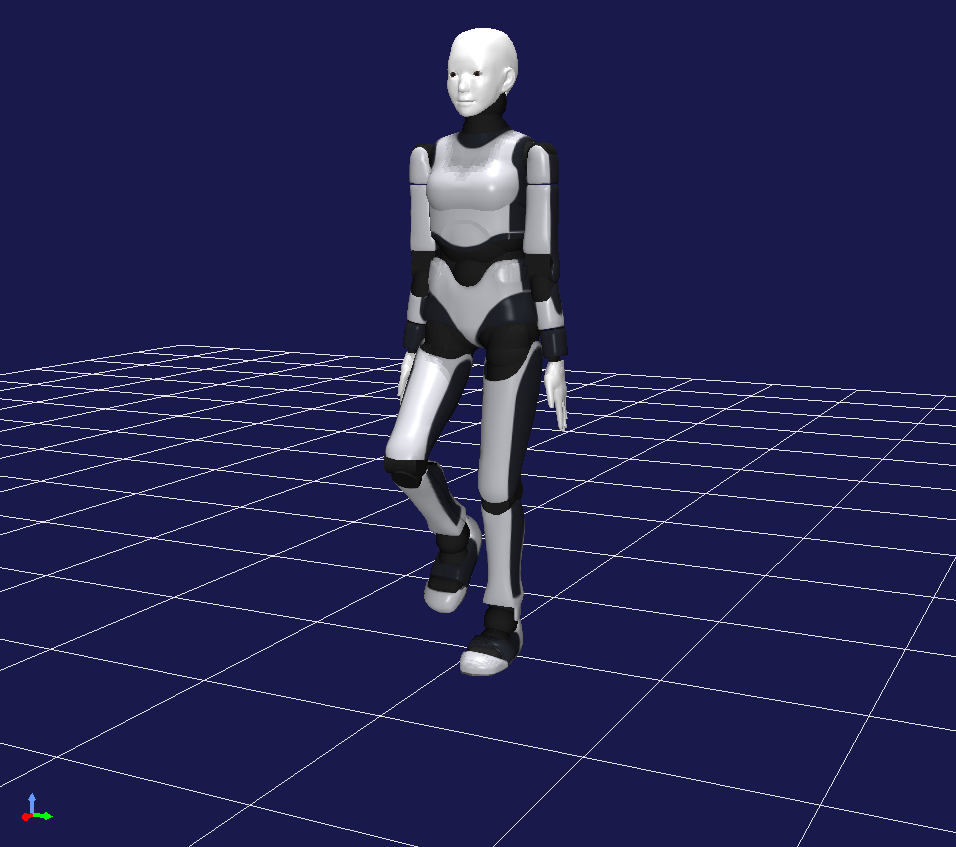

In [17]:
%display

### ロボットの座標系
ロボットの座標系は上部をZ軸とし、前方をX軸とする。

ワールド座標系は、Z軸方向が鉛直上向きとする。

In [18]:
robot.rootCoords()

<coordinates[0x555b40b28900] 0 0 0.784 / 0 0 0 1 >

In [19]:
cds = coordinates(fv(0, 0, 1.0))
robot.rootCoords(cds)

<coordinates[0x555b40b2b7d0] 0 0 1 / 0 0 0 1 >

### 四肢(limb), 効果器(EndEffector), 関節グループ
関節のまとまりで、先端にエンドエフェクターを持つものを定義する。

これを便宜上、四肢(limb)と名づける。

名前は自由だが、arm, rarm, larm, rleg, lleg, neck, torso はアクセサが準備されている。

In [5]:
robot.registerEndEffector('larm', ## end-effector
                          'L_WRIST_R', ## tip-link
                          joint_tuples = (('L_SHOULDER_P', 'shoulder-p'),
                                          ('L_SHOULDER_R', 'shoulder-r'),
                                          ('L_SHOULDER_Y', 'shoulder-y'),
                                          ('L_ELBOW_P', 'elbow-p'),
                                          ('L_WRIST_Y', 'wrist-y'),
                                          ('L_WRIST_R', 'wrist-r'),
                                          )
                          )
robot.registerEndEffector('rarm', ## end-effector
                          'R_WRIST_R', ## tip-link
                          joint_tuples = (('R_SHOULDER_P', 'shoulder-p'),
                                          ('R_SHOULDER_R', 'shoulder-r'),
                                          ('R_SHOULDER_Y', 'shoulder-y'),
                                          ('R_ELBOW_P', 'elbow-p'),
                                          ('R_WRIST_Y', 'wrist-y'),
                                          ('R_WRIST_R', 'wrist-r'),
                                          )
                          )

In [21]:
robot.larm

#### limbのangle-vector

In [22]:
lvec = robot.larm.angleVector()
lvec

array([0., 0., 0., 0., 0., 0.])

In [23]:
lvec[0] = -0.4
robot.larm.angleVector(lvec)

array([-0.4,  0. ,  0. ,  0. ,  0. ,  0. ])

#### limbの名前アクセス


ジョイント名

In [24]:
robot.larm.jointNames

['L_SHOULDER_P', 'L_SHOULDER_R', 'L_SHOULDER_Y', 'L_ELBOW_P', 'L_WRIST_Y', 'L_WRIST_R']

ニックネームを付けることができる

In [25]:
robot.larm.renameMap

{'shoulder-p': 'L_SHOULDER_P', 'shoulder-r': 'L_SHOULDER_R', 'shoulder-y': 'L_SHOULDER_Y', 'elbow-p': 'L_ELBOW_P', 'wrist-y': 'L_WRIST_Y', 'wrist-r': 'L_WRIST_R'}

関節への名前アクセス等はモデル全体と同じようにできる

In [26]:
robot.larm.jointAngle('shoulder-p')

-0.4

In [27]:
robot.larm.setAngleMap({'shoulder-p': 0.4, 'elbow-p': -0.8})

True

In [28]:
robot.rarm.setAngleMap({'shoulder-p': 0.4, 'elbow-p': -0.8})

True

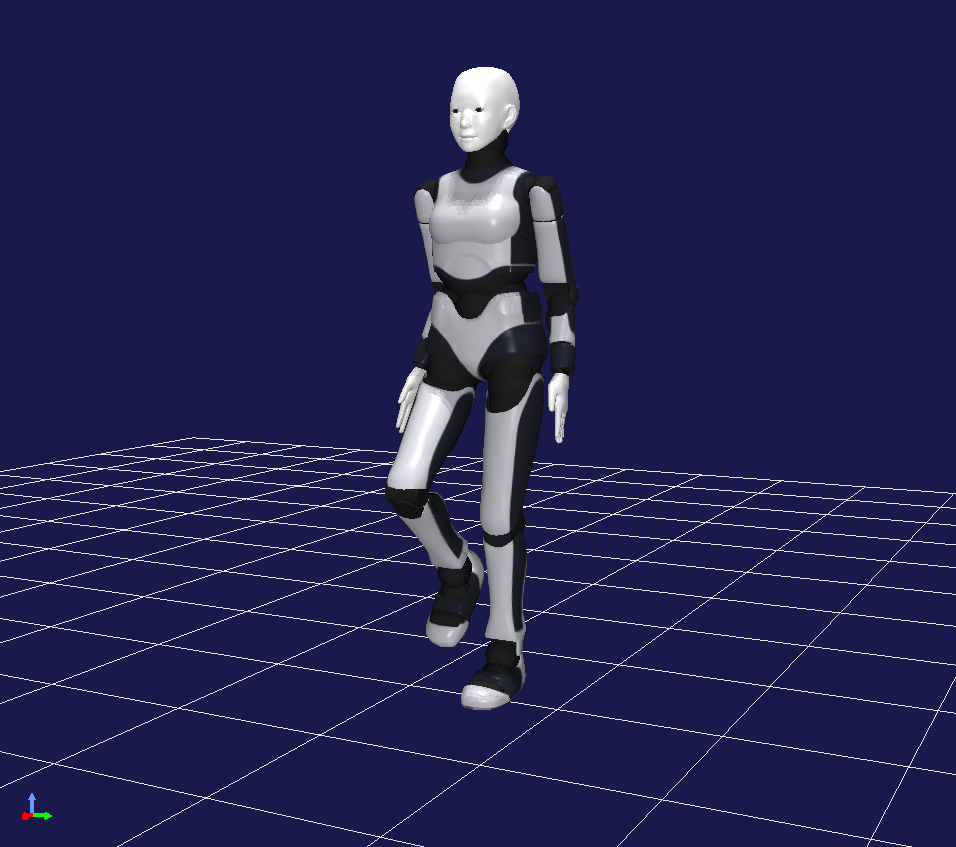

In [29]:
%display

#### 手先効果器(EndEffector)

In [102]:
robot.larm.angleVector(fv(0.2, 0.2, 0, -0.4, 0.2, 0, 0))

array([ 0.2,  0.2,  0. , -0.4,  0.2,  0. ])

In [103]:
robot.larm.endEffector

<coordinates[0x555b40b05760] -0.0392574 0.294167 1.00693 / 0.170257 -0.11912 0.0770031 0.975138 >

In [7]:
di = DrawInterface()

In [6]:
cds=mkshapes.makeCoords(coords=robot.larm.endEffector, length=0.2, lineWidth=5)

In [8]:
di.addObject(cds)

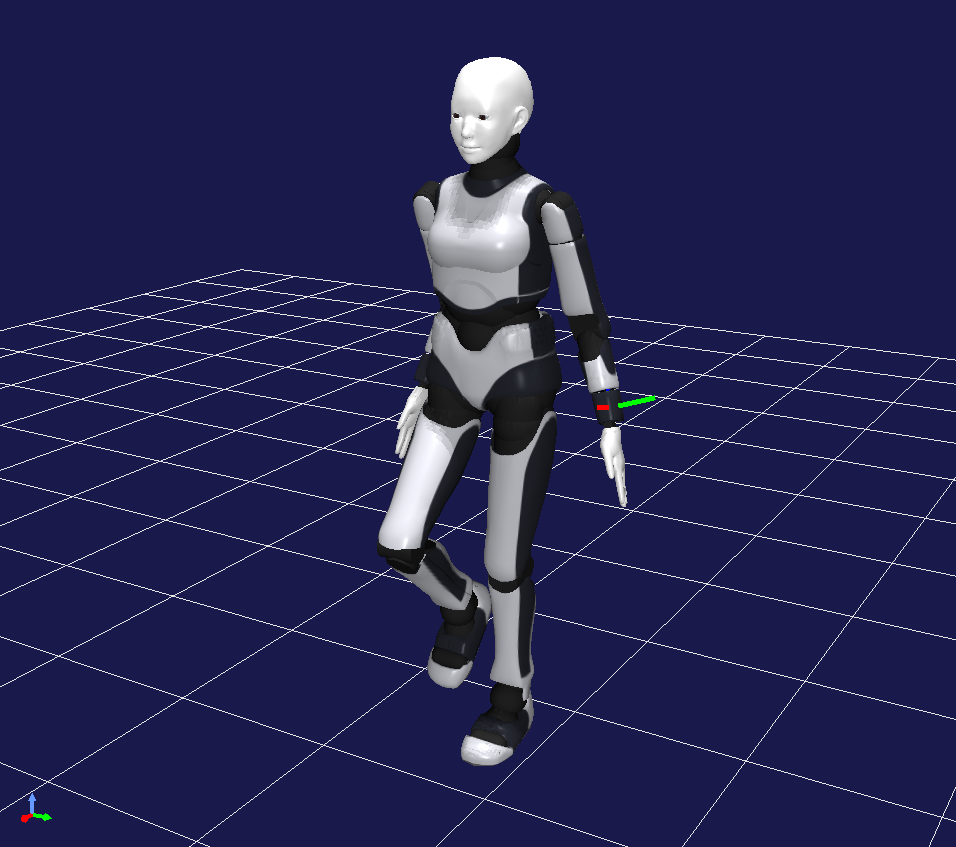

In [105]:
%display

#### 逆運動学

In [92]:
tgt = robot.larm.endEffector

In [100]:
### 相対的に動かす constraintは拘束する自由度を選択
robot.larm.move(fv(0.0, 0.0, 0.05), constraint='xyz')

(True, 4)

In [99]:
robot.larm.inverseKinematics(tgt)

(True, 14)

ターゲットを動かしてみる

In [95]:
tgt.translate(fv(0, 0., 0.05), coordinates.wrt.world)

<coordinates[0x555b50945cc0] -0.0392574 0.294167 1.05693 / 0.170257 -0.11912 0.0770031 0.975138 >

In [96]:
robot.larm.inverseKinematics(tgt, addNoise=0.5, constraint='xyzRPY')

(True, 9)

In [9]:
cds.newcoords(robot.larm.endEffector)

Wrap: <coordinates[0x5634ec4596f0] -0.03 0.198627 0.763934 / 0.0871557 0 0 0.996195 > | <cnoid.Util.SgPosTransform object at 0x7facd978adf0>

### 名前付きのポーズの設定

In [43]:
robot.registerNamedPose('default',
                        [0, 0, 0, 0, 0, 0, 0, ## LLEG
                         0, 0, 0, 0, 0, 0, 0, ## RLEG
                         0, 0, 0, ## CHEST
                         0, 0, 0, ## NECK
                         0, 0, 0, 0, 0, 0, ## LARM
                         0, 0, 0, 0, 0, 0, ## RARM
                         ])

DefaultPoseの呼び出し ```m.setNamedPose('default')``` と同じ

In [44]:
robot.setDefaultPose()

座標系も設定できる

In [ ]:
robot.registerNamedPose

In [51]:
robot.registerNamedPose('pose0',
                        angles = [0, 0, -0.5, 1.0, -.5, 0, 0, ## LLEG
                                 0, 0, -0.5, 1.0, -0.5, 0, 0, ## RLEG
                                 0, 0, 0, ## CHEST
                                 0, 0, 0, ## NECK
                                 0, 0, 0, 0, 0, 0, ## LARM
                                 0, 0, 0, 0, 0, 0, ## RARM
                                 ],
			            root_coords = coordinates(npa([0, 0, 0.68])))

In [52]:
robot.setNamedPose('pose0')

## ロボットの独自クラスを作る

In [11]:
class HRP4CModel(RobotModel):
    def __init__(self, robot=None):
        if robot is None:
            fname = iu.parseURL('choreonoid://share/model/HRP4C/HRP4C.body')
            if iu.isInChoreonoid():
                robot = ib.loadRobotItem(fname, world=False)
            else:
                robot = iu.loadRobot(fname)
        super().__init__(robot)
        self.registerEndEffector('larm', ## end-effector
                                 'L_WRIST_R', ## tip-link
                                 joint_tuples = (('L_SHOULDER_P', 'shoulder-p'),
                                                 ('L_SHOULDER_R', 'shoulder-r'),
                                                 ('L_SHOULDER_Y', 'shoulder-y'),
                                                 ('L_ELBOW_P', 'elbow-p'),
                                                 ('L_WRIST_Y', 'wrist-y'),
                                                 ('L_WRIST_R', 'wrist-r'),
                                                 )
                                 )
        self.registerEndEffector('rarm', ## end-effector
                                 'R_WRIST_R', ## tip-link
                                 joint_tuples = (('R_SHOULDER_P', 'shoulder-p'),
                                                 ('R_SHOULDER_R', 'shoulder-r'),
                                                 ('R_SHOULDER_Y', 'shoulder-y'),
                                                 ('R_ELBOW_P', 'elbow-p'),
                                                 ('R_WRIST_Y', 'wrist-y'),
                                                 ('R_WRIST_R', 'wrist-r'),
                                                 )
                                 )
        self.registerEndEffector('lleg', ## end-effector
                                 'L_ANKLE_R', ## tip-link
                                 tip_link_to_eef = coordinates(fv(0, 0, -0.092849)),
                                 joint_tuples = (('L_HIP_Y', 'hip-y'),
                                                 ('L_HIP_R', 'hip-r'),
                                                 ('L_HIP_P', 'hip-p'),
                                                 ('L_KNEE_P' ,'knee-p'),
                                                 ('L_ANKLE_P','ankle-p'),
                                                 ('L_ANKLE_R','ankle-r'),
                                                 )
                                 )
        self.registerEndEffector('rleg', ## end-effector
                                 'R_ANKLE_R', ## tip-link
                                 tip_link_to_eef = coordinates(fv(0, 0, -0.092849)),
                                 joint_tuples = (('R_HIP_Y', 'hip-y'),
                                                 ('R_HIP_R', 'hip-r'),
                                                 ('R_HIP_P', 'hip-p'),
                                                 ('R_KNEE_P' ,'knee-p'),
                                                 ('R_ANKLE_P','ankle-p'),
                                                 ('R_ANKLE_R','ankle-r'),
                                                 )
                                 )
        self.registerNamedPose('default',
                               [0, 0, 0, 0, 0, 0, 0, ## LLEG
                                0, 0, 0, 0, 0, 0, 0, ## RLEG
                                0, 0, 0, ## CHEST
                                0, 0, 0, ## NECK
                                0, 0, 0, 0, 0, 0, ## LARM
                                0, 0, 0, 0, 0, 0, ## RARM
                                ])
        self.setDefaultPose()

まえに表示したモデルは消しておく

In [30]:
robot = HRP4CModel()

In [31]:
robot.lleg.endEffector

<coordinates[0x564e15c42150] 0 0.06845 6.93889e-17 / 0 0 0 1 >

### 足先エンドエフェクタを座標に一致させる

In [32]:
robot.fixLegToCoords(coordinates())

In [33]:
robot.rleg.setAngleMap({'hip-p': -0.6, 'knee-p': 1.2, 'ankle-p': -0.6})
robot.lleg.setAngleMap({'hip-p': -0.6, 'knee-p': 1.2, 'ankle-p': -0.6})

True

True

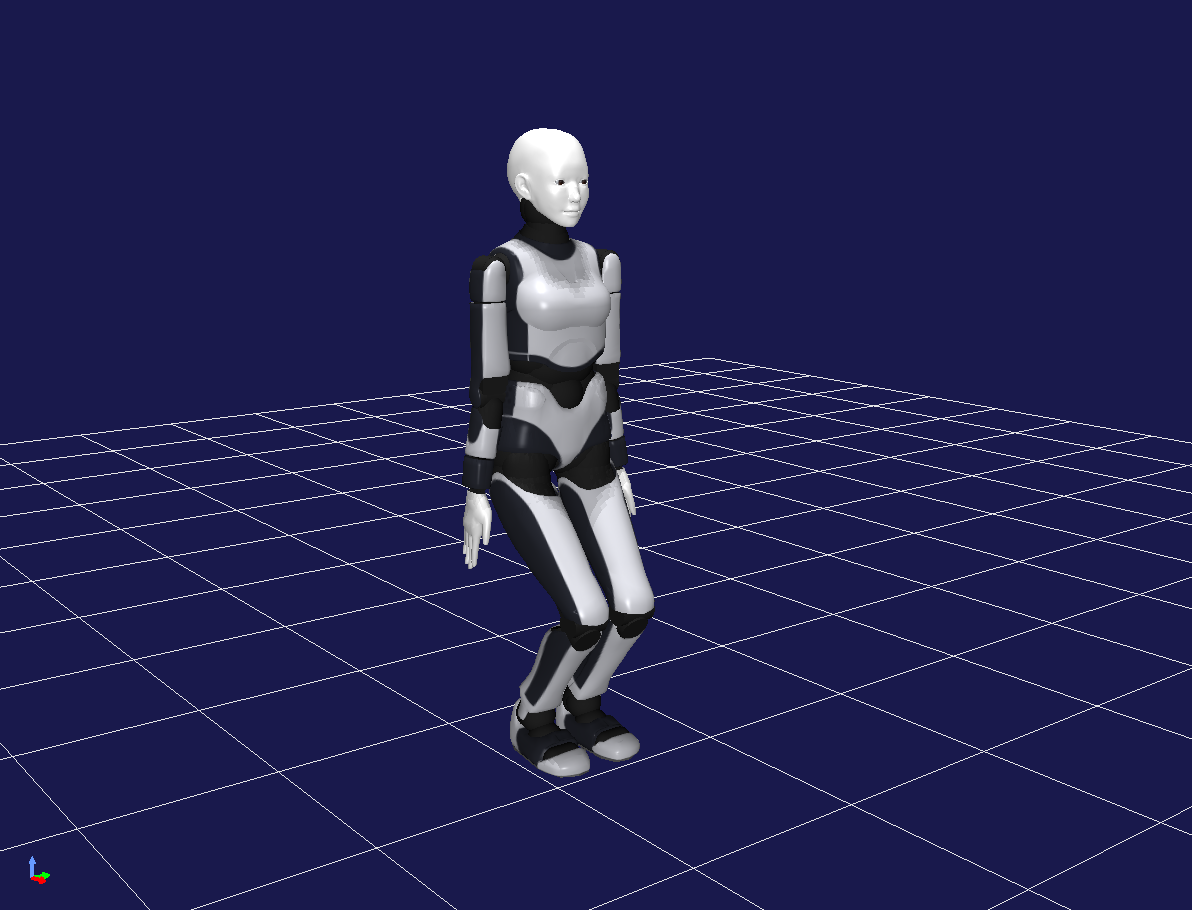

In [34]:
%display

In [35]:
robot.fixLegToCoords(coordinates())

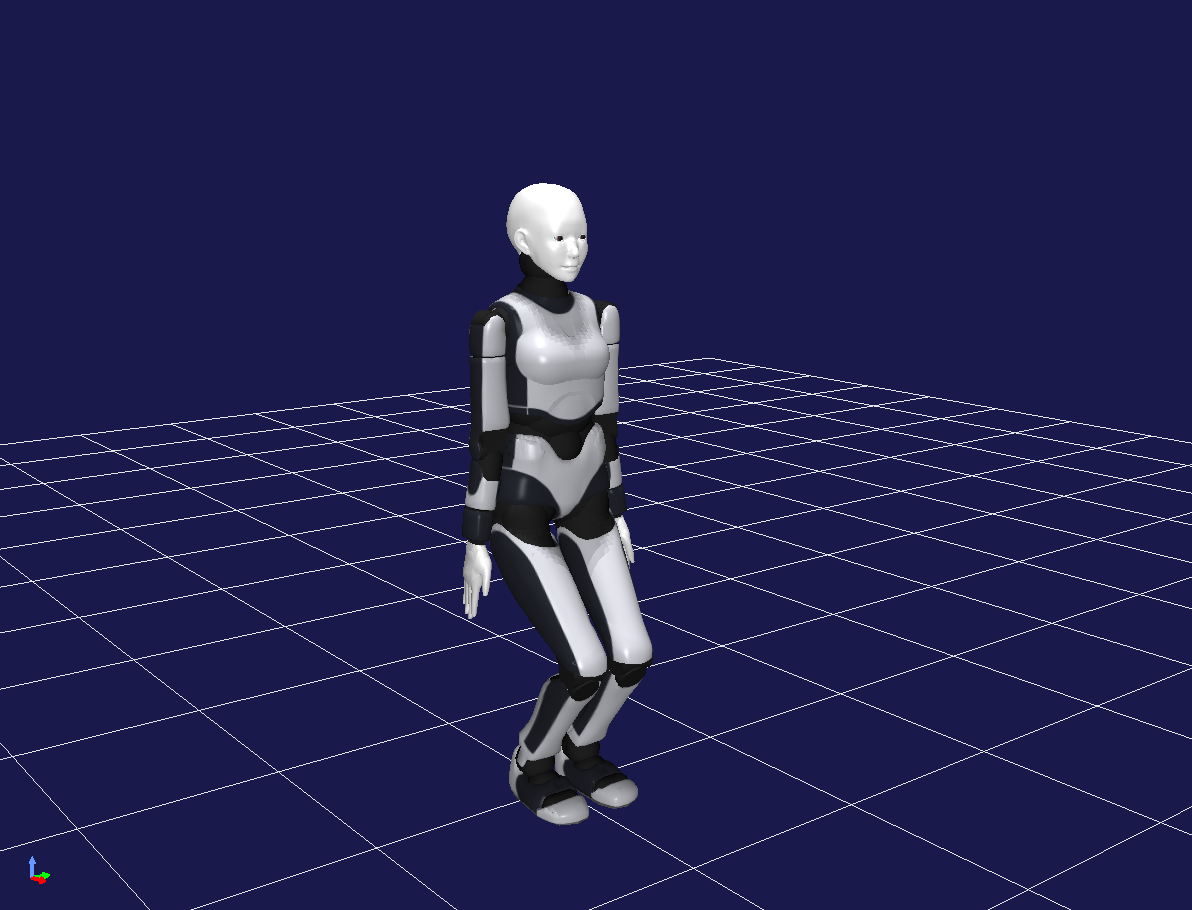

In [36]:
%display

### 重心の移動

In [37]:
robot.rleg.move(fv(0.15, 0, 0))
robot.lleg.move(fv(0.15, 0, 0))

(True, 3)

(True, 3)

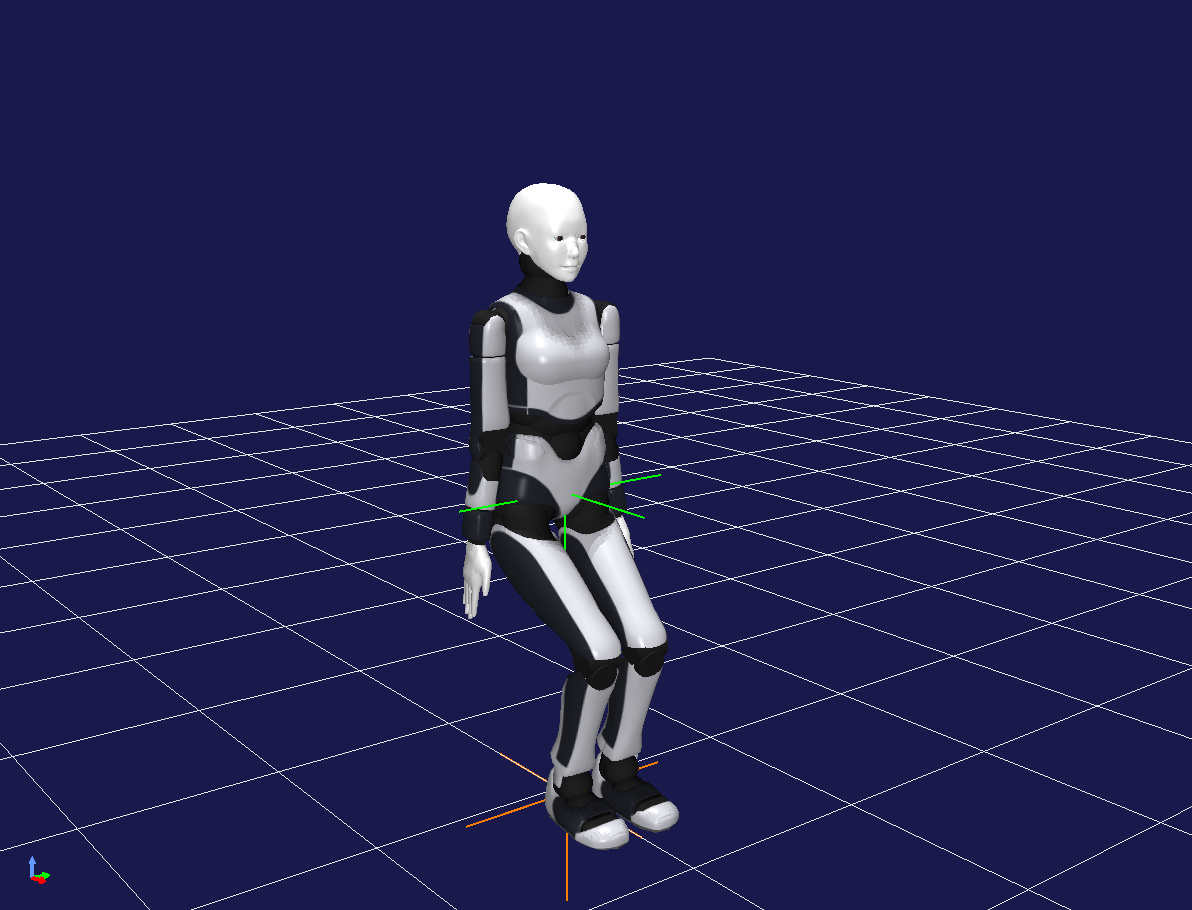

In [38]:
%display

In [39]:
robot.fixLegToCoords(coordinates())

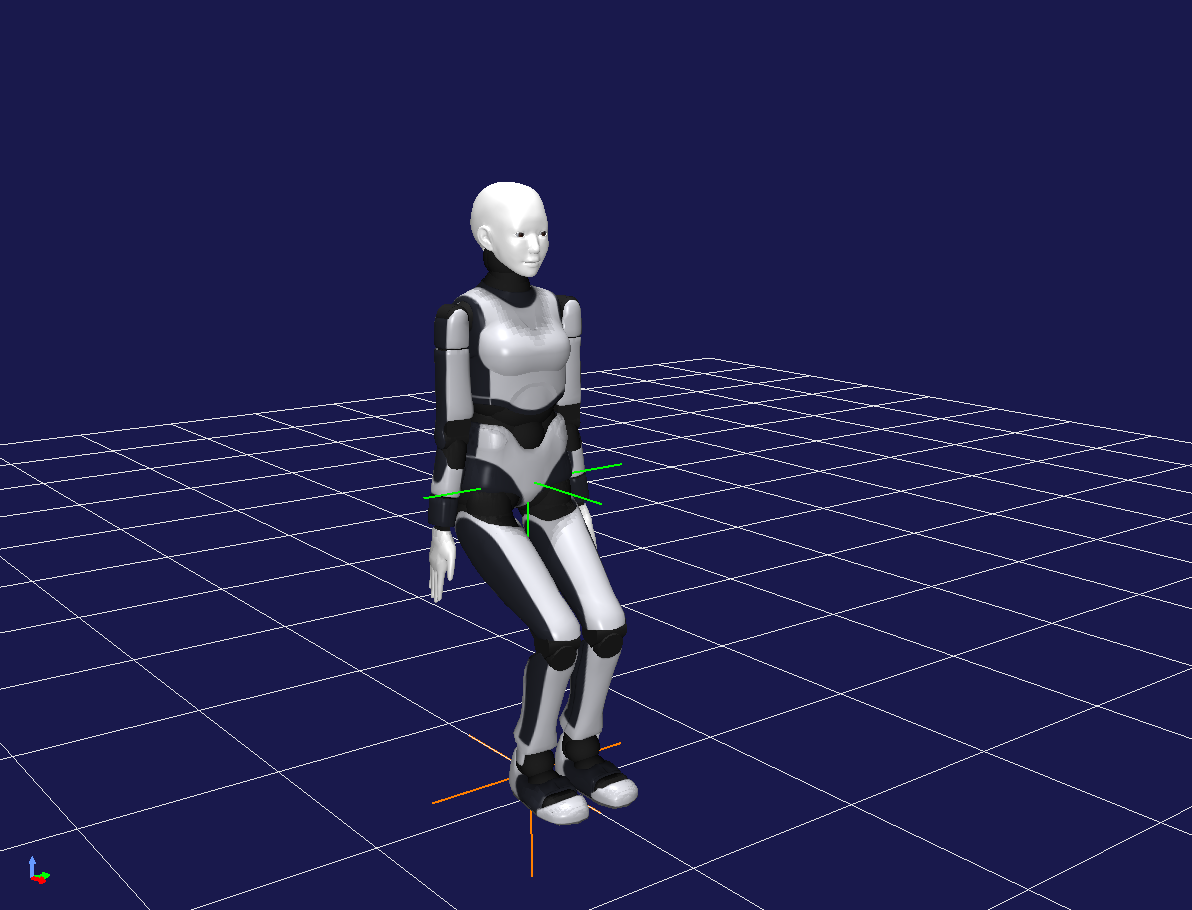

In [40]:
%display

In [41]:
robot.moveCentroidOnFoot()

(True, 3)

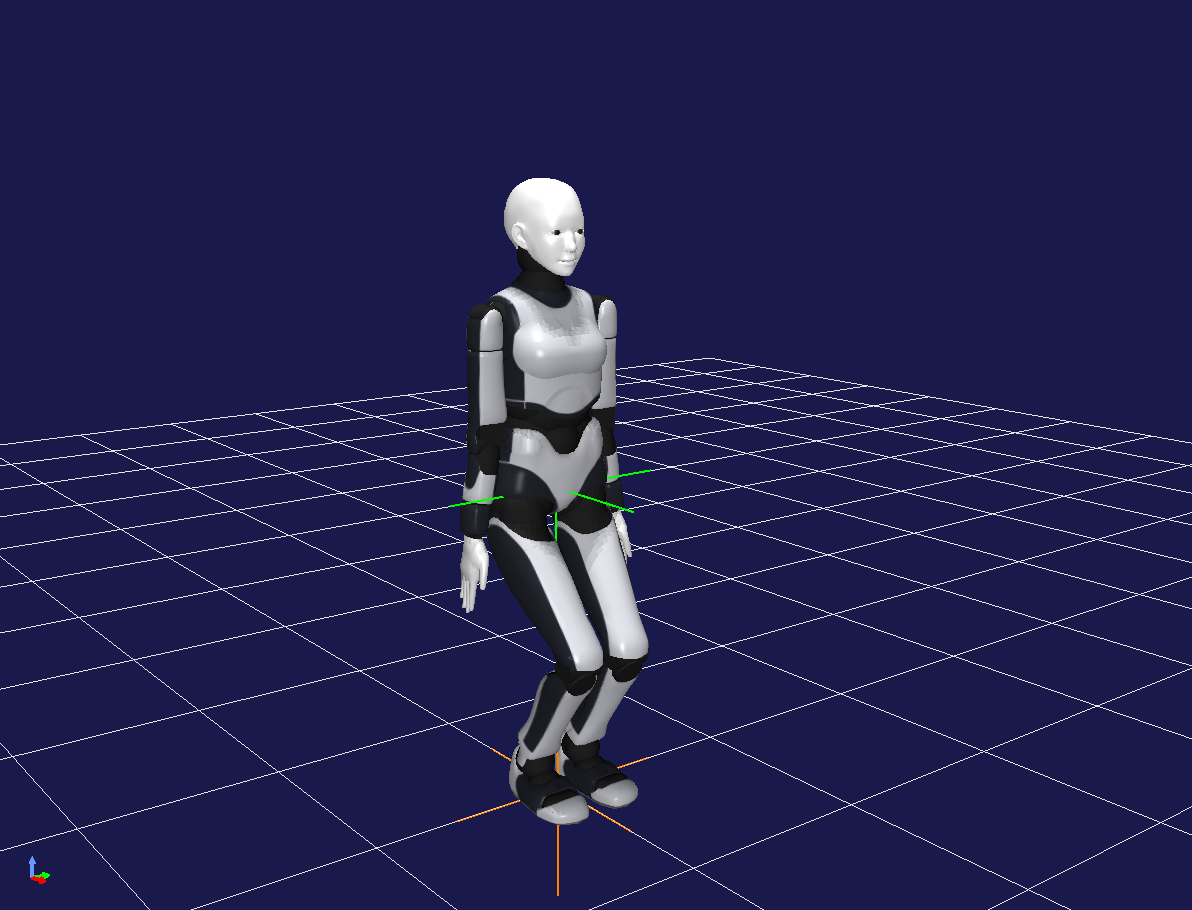

In [42]:
%display